# bounding boxes

In [1]:
(ns opencv4.boundingboxes
(:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

; http://docs.opencv.org/2.4/doc/tutorials/imgproc/shapedescriptors/bounding_rects_circles/bounding_rects_circles.html

nil

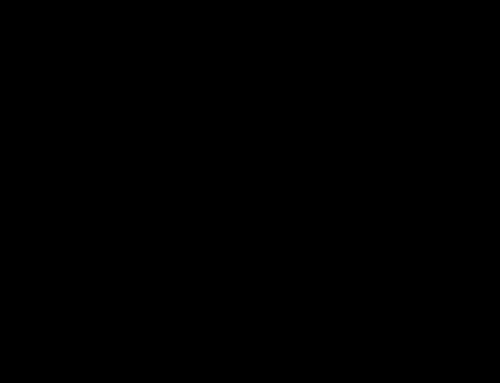

In [4]:
(def kikyu
  (-> "resources/chapter03/mongolfieres.jpg"
   imread))

(u/>>> kikyu)

(def wrong-mask
  (-> kikyu 
      clone 
      (cvt-color! COLOR_BGR2GRAY)
 	  (threshold! 250 255 THRESH_BINARY)
      (median-blur! 7)))

(u/>>> wrong-mask)

In [6]:
(def mask
  (-> kikyu 
      clone 
      (cvt-color! COLOR_RGB2HSV)
      (in-range! (new-scalar 10 30 30) (new-scalar 30 255 255))
      (median-blur! 7)
      ))

(u/>>> mask)

(def work (-> mask bitwise-not!))

#'opencv4.boundingboxes/work

In [7]:
(def contours (new-arraylist))
(find-contours work contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE (new-point 0 0))

nil

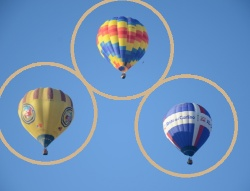

In [8]:
; draw bounding box using bounding-rect
(def output_ (clone kikyu))

(def my-contours 
  (filter 
  #(and
  (> (contour-area %) 50 )
  (> (.height (bounding-rect %)) 40)  
  (> (.width (bounding-rect %)) 60))                    
   contours))

(doseq [c my-contours]
  ;(if (> (contour-area c) 50 )
    (let [ rect (bounding-rect c)]
   ;   (if (and  (> (.height rect) 40)  (> (.width rect) 60))
      (circle
        output_
        (new-point (+ (/ (.width rect) 2) (.x rect))
                   (+ (.y rect) (/ (.height rect) 2)))
        100
        rgb/tan
        5)))

(count my-contours)
(-> output_ (u/resize-by 0.5) u/>>> )

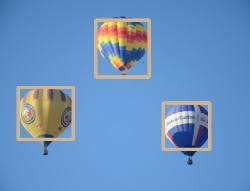

In [9]:
; draw bounding box using bounding-rect
(def output (clone kikyu))

(doseq [c my-contours]
  ;(if (> (contour-area c) 50 )
    (let [ rect (bounding-rect c)]
  ;    (if (and  (> (.height rect) 40)  (> (.width rect) 60))
      (rectangle
        output
        (new-point (.x rect) (.y rect))
        (new-point (+ (.width rect) (.x rect)) (+ (.y rect) (.height rect)))
        rgb/tan
        5)))
(-> output (u/resize-by 0.5) u/>>> )